# Univariate Time Series Forecasting using ARIMA $ SARIMAX

Problem Statement
    -To forecast the sales for grocery store for the next 12 months


In [1]:
# import required libraries

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
#load data
df=pd.read_csv("Grocery-Store-Sales-Time-Series-Dataset.csv",parse_dates=True,index_col="date")
df


,sales
date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0
2021-06-01,65591.0
2021-07-01,67853.0
2021-08-01,67414.0
2021-09-01,65925.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2021-01-01 to 2025-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   51 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [5]:
#drop null value present in dataset
df.dropna(inplace=True)

In [6]:
# to get number of rows and columns present
df.shape

(51, 1)

In [7]:
# check first few rows of dataset
df.head()

,sales
date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0


In [8]:
df.tail()

,sales
date,
2024-11-01,76232.0
2024-12-01,78601.0
2025-01-01,76065.0
2025-02-01,69314.0
2025-03-01,75275.0


# checking stationarity of given series

 Mean and Variance should be constant over time

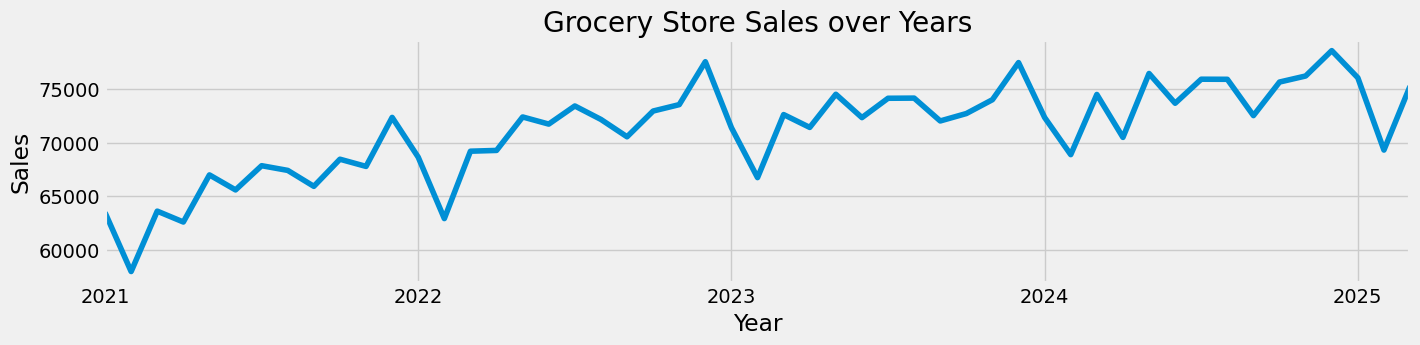

In [9]:

# plotting the sales trend over years
plt.figure(figsize=(15,3))
df["sales"].plot()
plt.title("Grocery Store Sales over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [10]:
print(df.columns)


Index(['sales'], dtype='object')


## How to make series stationary?


use differencing technique

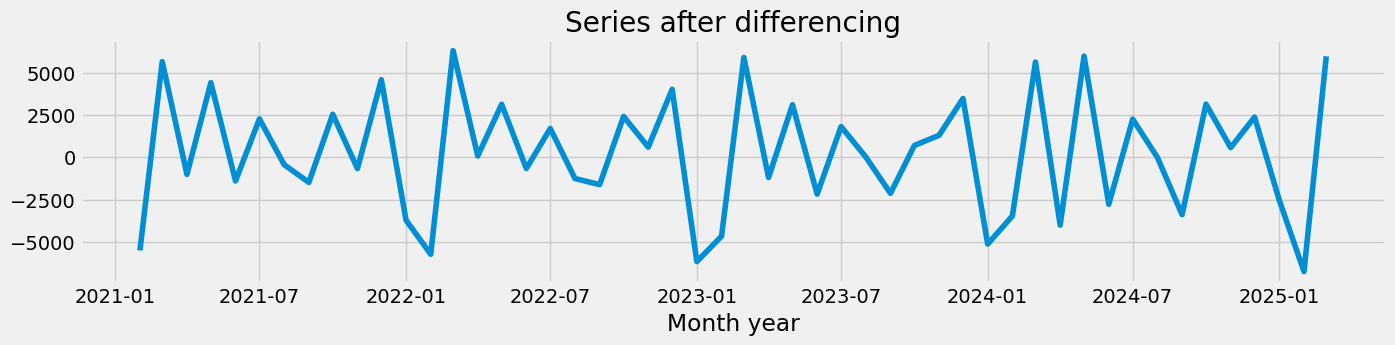

In [11]:
# taking 1st level of differencing
df1=df.diff()
df1.dropna(inplace=True)


# plotting the sales trend over years
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("Series after differencing")
plt.xlabel("Month year")
plt.show()

## Find value of AR(p),I(d)MA(q)

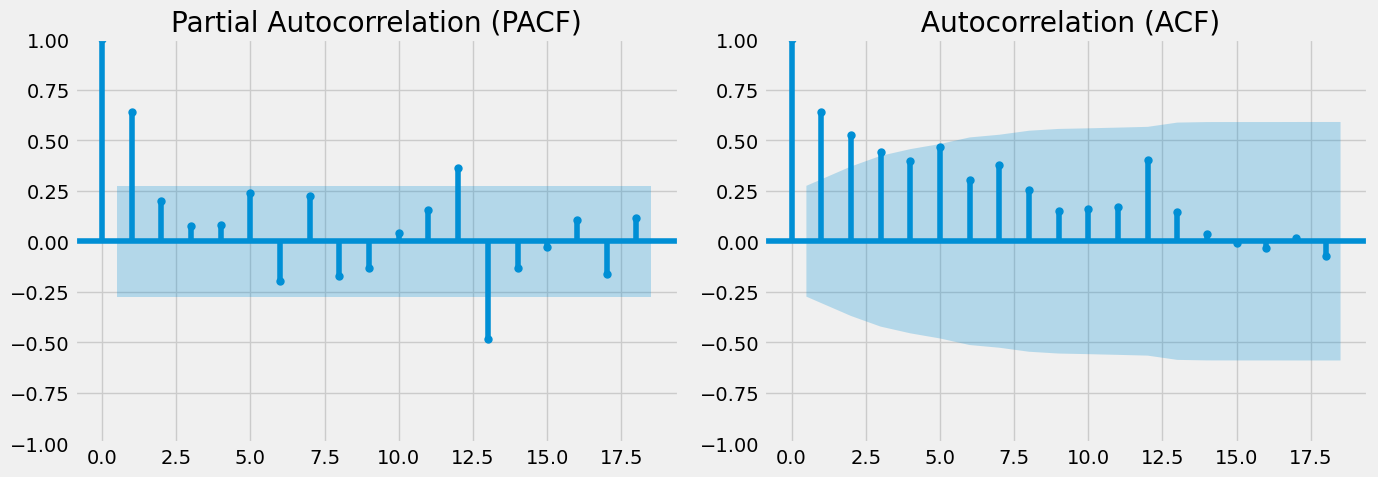

In [12]:
# import plot_acf,plot_pacf functions from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# create a 1 row ,2 column subplot
fig,ax =plt.subplots(1,2,figsize=(14,5))

# plot PACF on the first subplot
plot_pacf(df["sales"],ax=ax[0])
ax[0].set_title("Partial Autocorrelation (PACF)")

# plot ACF on the first subplot
plot_acf(df["sales"],ax=ax[1])
ax[1].set_title(" Autocorrelation (ACF)")

plt.tight_layout()
plt.show()
          

In [13]:
# splitting the data frame into training and testing datasets
train_df=df[:-12]
test_df=df[-12:]

#  Building ARIMA Model on Training Data

In [14]:

# import ARIMA class from statsmoels library
from statsmodels.tsa.arima.model import ARIMA

# create instance of ARIMA class
model_arima=ARIMA(train_df,order=(1,1,1))

# build the ARIMA Model
model_fit=model_arima.fit()

D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
# summary function will help to have closer look at statistical values
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -363.220
Date:                Sun, 09 Nov 2025   AIC                            732.439
Time:                        18:33:18   BIC                            737.352
Sample:                    01-01-2021   HQIC                           734.187
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.017     60.387      0.000       0.968       1.032
ma.L1         -0.9998      0.317     -3.150      0.002      -1.622      -0.378
sigma2      1.168e+07   2.87e-08   4.08e+14      0.0

In [16]:
# forecasting the next 12 months
n_forecast=12

# getting predictions for the forecast period 
predict=model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast -1)

# renaming series for clarity
predict.rename("predicted",inplace =True)

predict

2024-04-01    74714.235476
2024-05-01    74922.469989
2024-06-01    75130.703539
2024-07-01    75338.936126
2024-08-01    75547.167750
2024-09-01    75755.398412
2024-10-01    75963.628110
2024-11-01    76171.856846
2024-12-01    76380.084618
2025-01-01    76588.311428
2025-02-01    76796.537275
2025-03-01    77004.762159
Freq: MS, Name: predicted, dtype: float64

In [17]:
# creating new dataframe to store predictions
pred_df = pd.DataFrame(predict)

# renaming columns for clarity
pred_df.columns=["predicted_sales"]

# rounding off values to zero decimal places
pred_df["predicted_sales"]=round(pred_df["predicted_sales"],0)

pred_df

,predicted_sales
2024-04-01,74714.0
2024-05-01,74922.0
2024-06-01,75131.0
2024-07-01,75339.0
2024-08-01,75547.0
2024-09-01,75755.0
2024-10-01,75964.0
2024-11-01,76172.0
2024-12-01,76380.0
2025-01-01,76588.0


In [18]:
# creating new dataframe to store actual test data along with predictions by ARIMA model
actual_vs_pred=pd.concat([test_df,pred_df],axis=1)

#checking error in actual and predicted values
actual_vs_pred["error"]=actual_vs_pred["sales"]-actual_vs_pred["predicted_sales"]
# renaming columns for clarity
actual_vs_pred.rename(columns={"sales": "actual_sales"},inplace=True)

actual_vs_pred
            

,actual_sales,predicted_sales,error
2024-04-01,70496.0,74714.0,-4218.0
2024-05-01,76465.0,74922.0,1543.0
2024-06-01,73686.0,75131.0,-1445.0
2024-07-01,75931.0,75339.0,592.0
2024-08-01,75923.0,75547.0,376.0
2024-09-01,72532.0,75755.0,-3223.0
2024-10-01,75667.0,75964.0,-297.0
2024-11-01,76232.0,76172.0,60.0
2024-12-01,78601.0,76380.0,2221.0
2025-01-01,76065.0,76588.0,-523.0


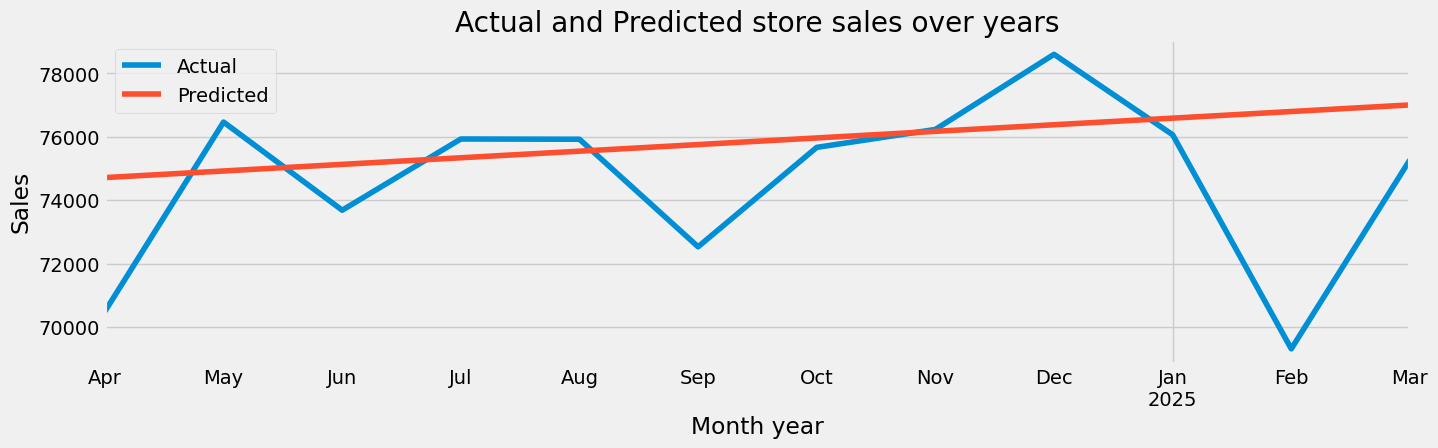

In [19]:
# plotting actual and predicted sales for test data for comparision
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted store sales over years")
plt.xlabel("Month year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

# Find optimal va;ues of non seasonal and seasonal order with auto arima function

In [20]:
# import auto_arima function from pmdarima library
from pmdarima import auto_arima

#passing non stationary data to auto_arima function
auto_arima_result=auto_arima(train_df,seasonal=True,m=12)

D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New fol

In [21]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -212.937
Date:                              Sun, 09 Nov 2025   AIC                            431.875
Time:                                      18:33:30   BIC                            435.649
Sample:                                  01-01-2021   HQIC                           432.962
                                       - 03-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5061      2.246     -0.225      0.822      -4.909       3.896
ma.S.L12       0.58

In [22]:
# optimal values of non_Seasonal order and seasonal order
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 0), (1, 1, 1, 12))

## Building SARIMAX Model on training data

In [23]:
# import SARIMAX class from statsmodels library
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(train_df,order=auto_arima_result.order, seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [24]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values for testing data
pred_values=model_fit.predict(stấrt=len(train_df),end=len(train_df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted", inplace=True)

# creating new dataframe to store predicted values for test data
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df


D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['stấrt']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


,predicted
2021-01-01,0.0
2021-02-01,63473.0
2021-03-01,57967.0
2021-04-01,63609.0
2021-05-01,62593.0
2021-06-01,66993.0
2021-07-01,65591.0
2021-08-01,67853.0
2021-09-01,67414.0
2021-10-01,65925.0


In [25]:
# creating new dataframe to store actual test data along with predictions by SARIMAX model
actual_vs_pred_df=pd.concat([test_df,pred_df],axis=1)

# checking error in actual and predicted values
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]

# renaming columns for clarity
actual_vs_pred_df.rename(columns={"sales": "actual_sales"}, inplace=True)
actual_vs_pred_df.rename(columns={"predicted": "predicted_sales"}, inplace=True)

actual_vs_pred_df

,actual_sales,predicted_sales,error
2021-01-01,NaN,0.0,NaN
2021-02-01,NaN,63473.0,NaN
2021-03-01,NaN,57967.0,NaN
2021-04-01,NaN,63609.0,NaN
2021-05-01,NaN,62593.0,NaN
2021-06-01,NaN,66993.0,NaN
2021-07-01,NaN,65591.0,NaN
2021-08-01,NaN,67853.0,NaN
2021-09-01,NaN,67414.0,NaN
2021-10-01,NaN,65925.0,NaN


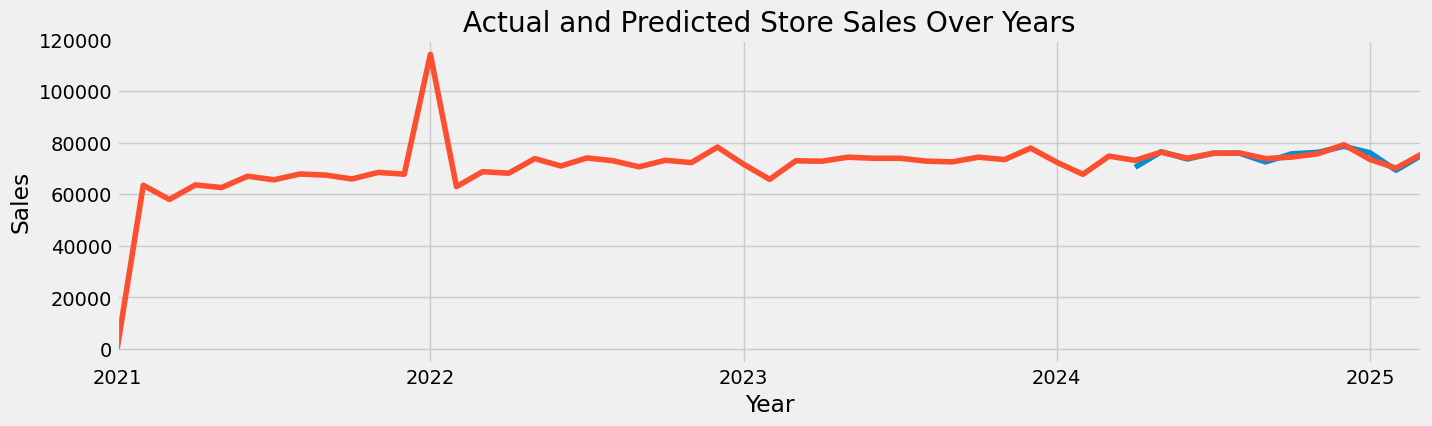

In [26]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

# Training SARIMAX model on entire data


In [27]:
# passing non stationary data to auto_arima function
auto_arima_result=auto_arima(df,seasonal=True,m=12)



D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New folder\envs\py311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\New fol

In [28]:
# summary function will help to have closer look at statistical values
print(auto_arima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -325.575
Date:                            Sun, 09 Nov 2025   AIC                            657.151
Time:                                    18:33:36   BIC                            662.064
Sample:                                01-01-2021   HQIC                           658.899
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0399      0.134      0.297      0.767      -0.223       0.303
ar.S.L24      -0.0585      0.058   

In [29]:
# create instance of SARIMAX class and providing values of non-seasonal and seasonal order given by auto_arima function
model_sarimax=SARIMAX(df, onder=auto_arima_result.order, seasonal_order=auto_arima_result.seasonal_order)

# building SARIMAX model
model_fit=model_sarimax.fit()

D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\New folder\envs\py311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['onder']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [30]:
# time period in months for which we are forecasting sales
n_forecast=12

# predict function will return series with predicted values
pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

# renaming columns for clarity
pred_values = pred_values.rename("predicted", inplace=True)

# creating new dataframe to store predicted values
pred_df=pd.DataFrame(pred_values)

# rounding off values to zero decimal places
pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2025-04-01,70441.0
2025-05-01,76756.0
2025-06-01,73866.0
2025-07-01,76167.0
2025-08-01,76188.0
2025-09-01,72630.0
2025-10-01,76023.0
2025-11-01,76516.0
2025-12-01,78736.0
2026-01-01,76545.0


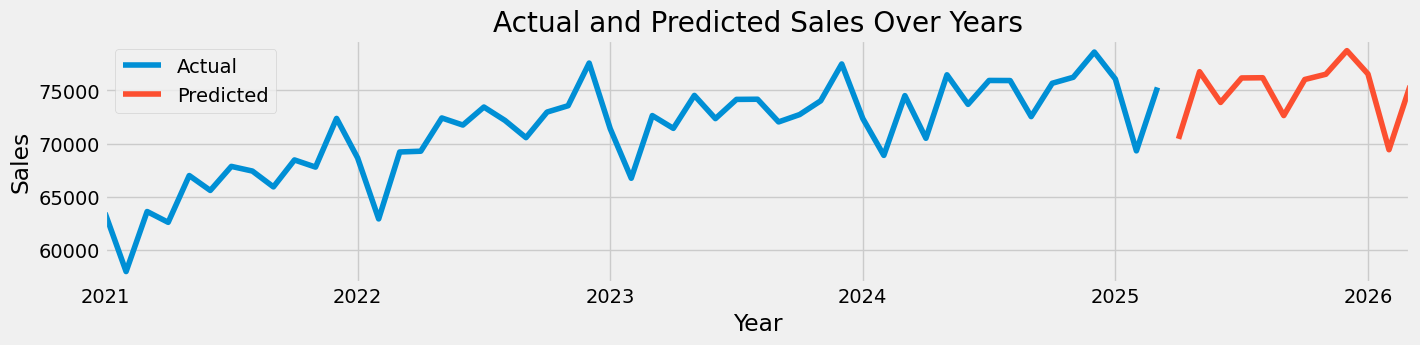

NameError: name 'I' is not defined

In [31]:
# plotting actual and predicted sales over years
plt.figure(figsize=(15,3))
df["sales"].plot (legend=True,label="Actual")
pred_df["predicted"].plot(legend=True,label="Predicted")
plt.title("Actual and Predicted Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

